#### Import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Class Imbalance 

####  Type Of Class Imbalance

1. upsampling
2. downsampling
3. SMOTE (synthetic minority oversampling techniques)

In [2]:
np.random.seed(1)
no_of_sample =1000
no_of_class_ratio =0.9
no_of_class0 =int(no_of_class_ratio * no_of_sample)
no_of_class1 =100

In [5]:
class_0 ={"feature1":np.random.normal(0,1,no_of_class0),
         "feature2":np.random.normal(0,1,no_of_class0),
         "target":[0]*no_of_class0}

class_0 =pd.DataFrame(class_0)
class_0

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
895,-1.322762,-1.140488,0
896,0.540306,0.501016,0
897,-0.507257,0.225767,0
898,1.128379,-1.089087,0


In [6]:
class_1 ={"feature1":np.random.normal(0,1,no_of_class1),
         "feature2":np.random.normal(0,1,no_of_class1),
         "target":[1]*no_of_class1}

class_1 =pd.DataFrame(class_1)
class_1

,feature1,feature2,target
0,-0.098819,0.613719,1
1,-0.270149,-0.082253,1
2,1.745068,-0.144220,1
3,-0.180558,0.792378,1
4,-0.202378,-0.302272,1
...,...,...,...
95,-0.752715,1.236735,1
96,1.360377,1.116299,1
97,0.386375,0.675240,1
98,0.388515,0.022452,1


### Combine two Dataframe 

In [11]:
df =pd.concat([class_0,class_1]).reset_index(drop=True)
df

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
995,-0.752715,1.236735,1
996,1.360377,1.116299,1
997,0.386375,0.675240,1
998,0.388515,0.022452,1


#### Define Minority and Majority Class 

In [21]:
df_Minority =df[df.target ==1]
df_majority =df[df.target ==0]

In [22]:
df_Minority

,feature1,feature2,target
900,-0.098819,0.613719,1
901,-0.270149,-0.082253,1
902,1.745068,-0.144220,1
903,-0.180558,0.792378,1
904,-0.202378,-0.302272,1
...,...,...,...
995,-0.752715,1.236735,1
996,1.360377,1.116299,1
997,0.386375,0.675240,1
998,0.388515,0.022452,1


In [23]:
df_majority

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
895,-1.322762,-1.140488,0
896,0.540306,0.501016,0
897,-0.507257,0.225767,0
898,1.128379,-1.089087,0


### UpSampling technique

In [25]:
from sklearn.utils import resample

df_minority_upsampled =resample(df_Minority ,replace=True ,n_samples=len(df_majority),random_state=1)
df_minority_upsampled

,feature1,feature2,target
937,-1.642020,-1.563037,1
912,0.031925,1.110404,1
972,-1.179825,1.590844,1
909,-0.189790,-0.938604,1
975,-0.660496,0.891213,1
...,...,...,...
936,1.228505,0.963701,1
998,0.388515,0.022452,1
901,-0.270149,-0.082253,1
932,0.855587,0.597946,1


### Downsample

In [26]:
df_downsampled =resample(df_majority ,replace=False ,n_samples=len(df_Minority),random_state=1)

In [27]:
df_downsampled

,feature1,feature2,target
860,-1.537535,0.122837,0
880,-0.838450,-1.586623,0
874,-0.771039,-1.448482,0
780,-2.018355,0.502019,0
525,-0.521316,0.452069,0
...,...,...,...
494,1.152007,0.781319,0
255,-0.241664,0.297858,0
672,-0.999110,-0.053589,0
481,-0.080607,-0.644226,0


### SMOTE

In [28]:
from sklearn.datasets import make_classification

X ,y =make_classification(n_samples=1000, n_redundant=0,n_features=2 ,n_clusters_per_class= 1,
                    weights=[0.90],random_state=100)

X

array([[ 0.58838794,  0.69888078],
       [ 0.96982181, -0.97997281],
       [ 1.71954863, -1.5010239 ],
       ...,
       [-1.53189897,  0.83323834],
       [ 0.50602726,  0.11486656],
       [-0.42033256, -0.47635414]])

In [29]:
y

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [31]:
len(y[y==0])

896

In [32]:
len(y[y==1])

104

In [33]:
df1 =pd.DataFrame(X ,columns=["F1","F2"])
df2 =pd.DataFrame(y ,columns=["target"])

In [34]:
df1

,F1,F2
0,0.588388,0.698881
1,0.969822,-0.979973
2,1.719549,-1.501024
3,-4.071518,-0.095789
4,1.313544,-0.414550
...,...,...
995,-0.794774,0.569555
996,-1.695362,1.129112
997,-1.531899,0.833238
998,0.506027,0.114867


In [35]:
df2

,target
0,0
1,1
2,1
3,0
4,1
...,...
995,0
996,0
997,0
998,0


In [36]:
df_final =pd.concat([df1,df2],axis=1)
df_final

,F1,F2,target
0,0.588388,0.698881,0
1,0.969822,-0.979973,1
2,1.719549,-1.501024,1
3,-4.071518,-0.095789,0
4,1.313544,-0.414550,1
...,...,...,...
995,-0.794774,0.569555,0
996,-1.695362,1.129112,0
997,-1.531899,0.833238,0
998,0.506027,0.114867,0


In [40]:
df_final.target.value_counts()

0    896
1    104
Name: target, dtype: int64

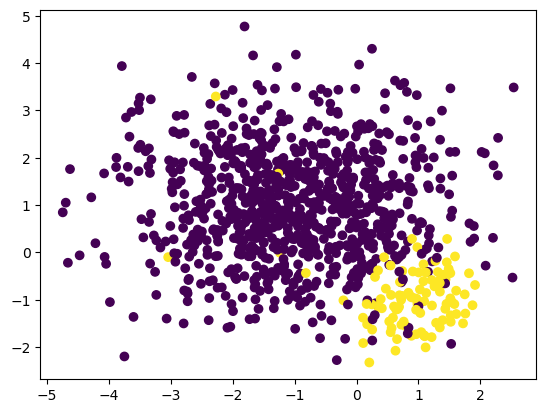

In [41]:
plt.scatter(df_final["F1"],df_final["F2"],c=df_final["target"])
plt.show()

In [42]:
pip install imblearn

     ------------------------------------- 258.0/258.0 kB 18.6 kB/s eta 0:00:00
     ------------------------------------ 301.8/301.8 kB 690.9 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.5 requires jinja2<3.1,>=3.0, but you have jinja2 3.1.2 which is incompatible.
dataprep 0.4.5 requires regex<2022.0.0,>=2021.8.3, but you have regex 2023.10.3 which is incompatible.
dataprep 0.4.5 requires sqlalchemy==1.3.24, but you have sqlalchemy 2.0.21 which is incompatible.


In [43]:
from imblearn.over_sampling import SMOTE
over_sample =SMOTE()
x ,y =over_sample.fit_resample(df_final[["F1","F2"]],df_final["target"])

In [48]:
df_1 =pd.DataFrame(x ,columns=["F1","F2"])
df_2 =pd.DataFrame(y ,columns=["target"])

In [49]:
oversample =pd.concat([df_1,df_2],axis=1)
oversample

,F1,F2,target
0,0.588388,0.698881,0
1,0.969822,-0.979973,1
2,1.719549,-1.501024,1
3,-4.071518,-0.095789,0
4,1.313544,-0.414550,1
...,...,...,...
1787,1.501548,-1.235863,1
1788,1.021355,-0.385736,1
1789,0.906263,-0.957707,1
1790,1.358705,-1.540195,1


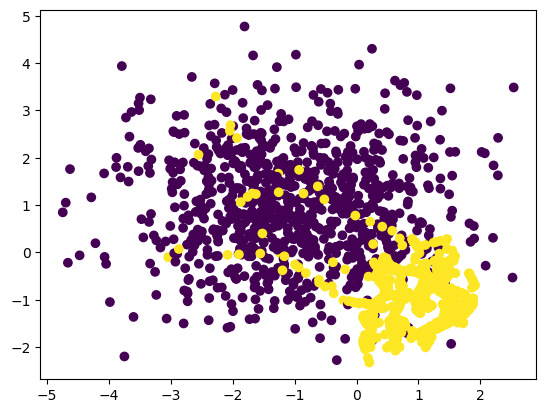

In [50]:
plt.scatter(oversample["F1"],oversample["F2"],c=oversample["target"])
plt.show()